# node2vec

In [1]:
import pandas as pd
import tqdm as tq
import gensim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PATH = "/Users/apple/Google Drive/_My Data Analytics Exercise/Exercise/Cytoscape/KEGG enzymes/"

In [3]:
# The sentence is 
# "L-glutamate catalyses 
# ATP and L-cysteine 
# to produce 
# ADP and phosphate and gamma-L-glutamyl-L-cysteine"
nodes = ['L-glutamate', 'catalyses', 'ATP', 'and', 'L-cysteine', 'to', 'produce', 'ADP', 'phosphate', 'gamma-L-glutamyl-L-cysteine']

In [4]:
df = pd.read_csv(PATH+"RandomWalk.csv")

In [5]:
df.head()

,path
0,"['L-glutamate', 'catalyses', 'produce', 'ADP',..."
1,"['L-glutamate', 'catalyses', 'ATP', 'catalyses..."
2,"['L-glutamate', 'catalyses', 'ATP', 'L-cystein..."
3,"['L-glutamate', 'catalyses', 'produce', 'ADP',..."
4,"['L-glutamate', 'catalyses', 'produce', 'ADP',..."


In [6]:
from tqdm import tqdm
def generate_corpus(df, nodes):
    """extract texts from dataframe into proper corpus"""
    text = list()
    collection = list()
    for i in tqdm(range(len(df))):
        sent = df.loc[i, 'path']
        for t in sent.split(","):
            for node in nodes:
                if node in t:
                    text.append(node)
        collection.append(text)
    return collection

In [7]:
corpus = generate_corpus(df, nodes)

100%|██████████| 10000/10000 [00:00<00:00, 12226.78it/s]


In [8]:
type(corpus)

list

In [4]:
from gensim.models import Word2Vec

In [11]:
import time
start = time.time()
model = Word2Vec(sentences=corpus, window=5, min_count=1, workers=20)
sec = time.time()-start
print ("Processing time: %.2f" %sec)

Processing time: 3396.05


In [12]:
model.save(PATH+"node2vec.model")

In [13]:
# Similarity comparison
for node in nodes:
    print ("Token = %s" %node)
    print (model.wv.similar_by_word(node))
    print ()

Token = L-glutamate
[('ATP', 0.6996369361877441), ('and', 0.594517707824707), ('catalyses', 0.2938745319843292), ('to', -0.0382830835878849), ('produce', -0.3871094286441803), ('gamma-L-glutamyl-L-cysteine', -0.4437866508960724), ('L-cysteine', -0.4582892060279846), ('phosphate', -0.5956308245658875), ('ADP', -0.6302241086959839)]

Token = catalyses
[('ATP', 0.4969886243343353), ('L-cysteine', 0.29615771770477295), ('L-glutamate', 0.2938745319843292), ('ADP', 0.0063050054013729095), ('phosphate', -0.02758326381444931), ('and', -0.0415971539914608), ('gamma-L-glutamyl-L-cysteine', -0.14545486867427826), ('produce', -0.3758013844490051), ('to', -0.6427486538887024)]

Token = ATP
[('L-glutamate', 0.6996369361877441), ('catalyses', 0.4969886243343353), ('and', 0.42024293541908264), ('L-cysteine', -0.05145911127328873), ('gamma-L-glutamyl-L-cysteine', -0.3375800848007202), ('phosphate', -0.34251704812049866), ('ADP', -0.42829689383506775), ('produce', -0.5067824125289917), ('to', -0.5412697

## Distribution of the Node Vector

In [5]:
model = Word2Vec.load(PATH+"node2vec.model")

In [6]:
node_vec = dict()
for node in nodes:
    vec = model.wv[node]
    node_vec[node] = vec

In [39]:
import numpy as np
x = list()
y = list()
for key, values in node_vec.items():
    x.append(values)
    y.append(key)

In [76]:
from sklearn.manifold import LocallyLinearEmbedding


In [77]:
llm = LocallyLinearEmbedding(n_components=2, method='modified')


In [80]:
X_transformed = llm.fit_transform(x)

In [69]:
X_transformed.shape

(10, 2)

In [34]:
X_transformed[0]

array([0.65967297, 0.05376167])

In [40]:
y[0]

'L-glutamate'

In [29]:
import matplotlib.pyplot as plt

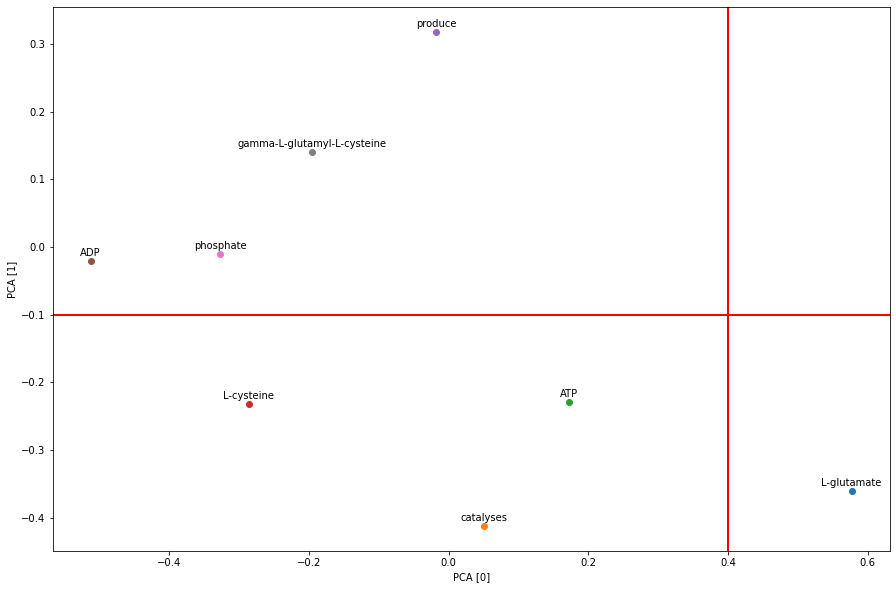

In [86]:
plt.figure(figsize=(15,10))
for index, pca  in enumerate(X_transformed):
    label = y[index]
    if label == 'and' or label == 'to':
        pass
    else:
        plt.scatter(pca[0], pca[1])
        plt.annotate(label, # this is the text
                     (pca[0],pca[1]), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,5), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
        plt.axhline(y=-0.1, color='r', linestyle='-')
        plt.axvline(x=0.4, color='r', linestyle='-')
        plt.xlabel('PCA [0]')
        plt.ylabel('PCA [1]')
plt.show()